# Explore data variance

## Setup

In [1]:
sample_file <- "sample_combined_2019-09-16.feather"

In [2]:
library(DataAnalysisTools)
library(tidyverse)
library(oildata)

── Attaching packages ────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ───────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
set.seed(6)

In [4]:
options(repr.plot.width=7, repr.plot.height=5.5)

## Load data

In [5]:
sample <- feather::read_feather(sample_file)
sample_n(sample, 5)

YEAR,OPERATOR_ID,CRUDE_AGE_UNKNOWN_MILES,CRUDE_AVG_AGE,CRUDE_INCIDENTS,CRUDE_MILES,CRUDE_MILES_1940,CRUDE_MILES_1950,CRUDE_MILES_1960,CRUDE_MILES_1970,⋯,HVL_MILES_2000_3,HVL_MILES_2010_3,NON_HVL_MILES_1940_3,NON_HVL_MILES_1950_3,NON_HVL_MILES_1960_3,NON_HVL_MILES_1970_3,NON_HVL_MILES_1980_3,NON_HVL_MILES_1990_3,NON_HVL_MILES_2000_3,NON_HVL_MILES_2010_3
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015,26049,0,31.3655,1,2.2,45.8,8.8,0,27.2,⋯,0.00,0.00,0,151.30,0.20,0.00,52.70,0.20,1.40,0.60
2011,ONEOK (Group),0,0.0000,0,0.0,0.0,0.0,0,0.0,⋯,4705.96,183.28,0,443.19,326.37,116.70,71.94,29.19,0.26,0.45
2005,4805,0,0.0000,0,0.0,0.0,0.0,0,0.0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2006,25146,0,0.0000,0,0.0,0.0,0.0,0,0.0,⋯,9.10,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2011,Chevron (Group),0,0.0000,0,0.0,0.0,0.0,0,0.0,⋯,154.69,0.00,170,1753.45,673.12,97.09,57.32,0.00,38.35,0.00


In [6]:
pipelines <- oildata::pipelines
sample_n(pipelines, 5)

year,ID,name,commodity,hca_offshore,hca_onshore,hca_total,total_onshore,total_offshore,total_miles
<dbl>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2009,Tesoro (Group),"Tesoro Refining & Marketing Co., Mountain Region",non-HVL,0.00,11.70,11.70,11.70,0.00,11.70
2006,18667,Plains Exploration & Production Company,Crude,10.15,19.82,29.97,19.82,10.15,29.97
2010,26045,Tesoro Hawaii Corporation,non-HVL,0.80,23.40,24.20,23.10,0.80,23.90
2005,31174,Shell Pipeline Company,Crude,19.90,1328.00,1347.90,2226.70,1540.50,3767.20
2011,31874,"Tesoro Refining & Marketing C O., Golden Eagle",non-HVL,NA,10.05,10.05,1.20,0.00,1.20


## Add missing names

In [7]:
sample$Name <- oildata::add_company_names(sample$OPERATOR_ID)
head(sample)

YEAR,OPERATOR_ID,CRUDE_AGE_UNKNOWN_MILES,CRUDE_AVG_AGE,CRUDE_INCIDENTS,CRUDE_MILES,CRUDE_MILES_1940,CRUDE_MILES_1950,CRUDE_MILES_1960,CRUDE_MILES_1970,⋯,HVL_MILES_2010_3,NON_HVL_MILES_1940_3,NON_HVL_MILES_1950_3,NON_HVL_MILES_1960_3,NON_HVL_MILES_1970_3,NON_HVL_MILES_1980_3,NON_HVL_MILES_1990_3,NON_HVL_MILES_2000_3,NON_HVL_MILES_2010_3,Name
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2015,1248,0,38.58750,1,64.000,0,0.000,359.000,149.00,⋯,0.00,0.00,0.000,147.000,0.000,0.000,80.00,0.000,0.000,Belle Fourche Pipeline
2015,14194,0,0.00000,0,0.000,0,0.000,0.000,0.00,⋯,0.00,0.00,0.000,0.000,0.000,0.000,16.74,28.940,0.000,"Oiltanking, Houston"
2015,15156,0,38.54918,0,211.000,79,10.000,168.000,113.00,⋯,0.00,49.00,12.000,600.000,179.000,3.000,138.00,188.000,114.000,Sinclair Transportation Company
2015,19319,0,0.00000,0,0.000,0,0.000,0.000,0.00,⋯,0.00,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,Tpc Group
2015,22430,0,59.68541,0,3.582,0,3.554,0.023,0.00,⋯,0.00,0.00,63.152,755.763,150.046,9.894,9.74,0.672,0.983,West Shore Pipeline
2015,22855,0,29.24262,1,798.900,0,213.880,0.000,264.61,⋯,36.53,5.59,0.630,29.790,4.260,2478.960,1096.80,13.740,2.530,"Flint Hills Resources, Lc"


## Dataset overview

### 1 - Pipelines raw datasets

* Different reporting rules (and datasets) for different periods of time.
* Companies file separate reports for separate commodities being transported.
* For historical reasons, some companies file separate reports for separate parts of the company, sometimes under the same ID, sometimes under separate IDs.
* Many things are inconsistent between datasets (e.g., commodities, variable names).

In [8]:
sample_n(pipelines_2010, 5)

DATAFILE_AS_OF,year,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,ID,name,PARTA4STREET,PARTA4CITY,PARTA4STATE,PARTA4ZIP,⋯,PARTE2010HF,PARTE2010LF,PARTE2010TOTAL,PARTETOTAL,PARTETOTALHF,PARTETOTALLF,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV
<dttm>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dttm>,<dttm>,<chr>
2019-12-02 04:39:03,2010,20110318,12373,18092,Sfpp,500 DALLAS STREET,HOUSTON,TX,77002,⋯,0.59,0,0.59,2584.360,1626.360,958.0,SUPPLEMENTAL,2011-08-15 13:31:39,2013-07-09 13:51:22,7000-1.1 (Rev. 06-2011)
2019-12-02 05:02:31,2014,20151272,13387,20202,Ultramar,2402 EAST ANAHEIM STREET,WILMINGTON,CA,90744,⋯,0.00,0,0.00,3.640,3.640,0.0,INITIAL,2015-06-03 11:59:48,2015-06-03 11:59:48,7000-1.1 (Rev. 06-2014)
2019-12-02 05:24:44,2017,20183076,15561,32258,Kinder Morgan Cochin,"1001 LOUISIANA ST., SUITE 1000",HOUSTON,TX,77002,⋯,1.43,0,1.43,237.260,237.260,0.0,INITIAL,2018-04-18 12:02:00,2018-04-18 12:02:00,7000-1.1 (Rev. 06-2014)
2019-12-02 04:43:41,2011,20130306,13134,39014,Galveston Bay Energy,"800 GESSNER RD, SUITE 200",HOUSTON,TX,77024,⋯,0.00,0,0.00,13.200,0.000,13.2,SUPPLEMENTAL,2013-06-13 11:57:45,2014-06-23 11:33:37,7000-1.1 (Rev. 06-2011)
2019-12-02 05:30:08,2018,20190416,16847,18678,St Louis Pipeline Operating,4120 HIGEL STREET,SARASOTA,FL,34242,⋯,0.38,0,0.38,21.819,21.819,0.0,INITIAL,2019-06-13 08:53:42,2019-06-13 08:53:42,7000-1.1 (Rev. 06-2014)


In [9]:
sample_n(pipelines_2004, 5)

ORIGINAL,SUPPLEMENT,year,RPTID,HL_SUP_ID,commodity,ID,name,PARENT,OFSTREET,⋯,BA_7,BA_8,DOR,DOE,PNAME,PPHONE,PEMAIL,PFAX,total_onshore,total_offshore
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Y,N,2005,20050367,1340,HVL,10012,Kaneb Pipe Line Company,NA,ONE VALERO WAY,⋯,0.000,NA,2006-06-19 20:00:00,2006-06-29 13:54:07,JIM STOKES,2103454693,JIM.STOKES@VALERO.COM,2103704693.0,1995.000,0
Y,N,2006,20060123,2352,Crude,32195,Signal Hill Petroleum,NA,2901 ORANGE AVENUE,⋯,1.229,NA,2007-05-28 20:00:00,2007-06-05 07:05:24,"JAMES S. LEE, REGULATORY SPECIALIST",5625956440.0,JSLEE@SHPI.NET,5624264587.0,1.229,0
Y,N,2005,20050042,856,non-HVL,22430,West Shore Pipeline Company,NA,"6100 S. YALE, PO BOX 3758",⋯,0.000,NA,2006-03-14 19:00:00,2006-03-15 11:10:48,CARTER FAIRLESS,9184955342,CFAIRLE@CITGO.COM,9184954601.0,597.000,0
Y,N,2009,20090189,7067,CO2 OR OTHER,31875,Merit Energy Company,NA,400 NORTH INDUSTRIAL BLVD.,⋯,0.000,0,2010-06-01 20:00:00,2010-06-02 08:40:30,BILL ELLSWORTH,3073282345,RICKY.WELCHER@MERITENERGY.COM,NA,118.000,0
Y,N,2008,20080025,4286,Crude,22430,West Shore Pipeline,NA,"6100 S. YALE, PO BOX 3758",⋯,0.000,NA,2009-02-11 19:00:00,2009-02-12 09:50:17,CARTER FAIRLESS,9184955342,CFAIRLE@CITGO.COM,9185242011,3.582,0


### 2 - Company groups and M&As

* I looked up all M&As and ownership on LexisNexis.
* Requires manual definition of aggregation rules.
* Aggregation takes place twice just for data on pipeline network: within companies, and for company groupings.
* In addition, might need to aggregate between commodities.

In [10]:
sample_n(m_as, 5)

group_name,members,start_year,end_year,type
<fct>,<fct>,<dbl>,<dbl>,<fct>
Kinder Morgan (Group),32258,NA,NA,group
Energy Transfer Partners (Group),LDH Energy (Group),2011,NA,m_a
Enbridge (Group),32080,NA,NA,group
Torrance (Group),39534,NA,NA,group
Tesoro (Group),39029,NA,NA,group


### 3 - Pipeline incidents

* Pipeline incidents are reported in a separate dataset.
* Each incident is a separate observation in that dataset.
* Obviously, aggregation is required again to obtain the number of incident per organization/commodity/year.

In [11]:
sample_n(select(incidents_2010, -narrative), 5)

REPORT_RECEIVED_DATE,year,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,ID,name,OPERATOR_STREET_ADDRESS,OPERATOR_CITY_NAME,OPERATOR_STATE_ABBREVIATION,⋯,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,PREPARER_TELEPHONE,PREPARER_FAX,PREPARED_DATE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
11/11/2016,2016,20160367,21826,ORIGINAL FINAL,15674,Plantation Pipe Line,"1001 LOUISIANA STREET, SUITE 1000",HOUSTON,TX,⋯,QUINTIN H FRAZIER,MANAGER-COMPLIANCE CODES AND STANDARDS,quintin_frazier@kindermorgan.com,770-751-4240,770-751-4183,11/11/2016,QUINTIN H FRAZIER,MANAGER-COMPLIANCE CODES AND STANDARDS,770-751-4240,quintin_frazier@kindermorgan.com
3/30/2018,2018,20180098,31636,SUPPLEMENTAL FINAL,39504,Magellan Crude Oil Pipeline Company,"ONE WILLIAMS CENTER, MD OTC-9",TULSA,OK,⋯,SHARRON LILLARD,AI ANALYST,sharron.lillard@magellanlp.com,918-574-7327,918-574-7376,2/11/2019,SHARRON LILLARD,AI ANALYST,918-574-7327,sharron.lillard@magellanlp.com
12/13/2017,2017,20170410,30473,SUPPLEMENTAL FINAL,11169,"Enbridge Energy, Limited Partnership",5400 WESTHEIMER COURT,HOUSTON,TX,⋯,STACY SOINE,COMPLIANCE ANALYST,stacy.soine@enbridge.com,715-395-3620,NA,6/7/2018,RON CARLBERG,SUPERVISOR US PIPELINE COMPLIANCE,715-395-3619,ron.carlberg@enbridge.com
12/9/2010,2010,20100288,19282,SUPPLEMENTAL FINAL,31476,Semgroup,11501 SOUTH I-44 SERVICE ROAD,OKLAHOMA CITY,OK,⋯,EDITH COEN,MANAGER DOT COMPLIANCE AND SAFETY,ecoen@semgroupcorp.com,918-640-3384,918-524-7243,4/17/2014,EDITH COEN,MANAGER DOT COMPLIANCE AND SAFETY,918-640-3384,ecoen@semgroupcorp.com
1/26/2018,2017,20180021,23072,ORIGINAL FINAL,18718,Sunoco Pipeline,1300 MAIN STREET,HOUSTON,TX,⋯,TODD NARDOZZI,SR. MANAGER - DOT COMPLIANCE,todd.nardozzi@energytransfer.com,281-637-6576,877-917-0448,1/26/2018,TODD NARDOZZI,SR. MANAGER - DOT COMPLIANCE,281-637-6576,todd.nardozzi@energytransfer.com


Rich data, e.g.:

In [12]:
sample_n(incidents_2010, 1)$narrative

[1] "CONTRACTOR WORKING FOR OPERATOR NOTIFIED THE STATION OPERATOR OF POSSIBLE LEAK.  THE #5-10\" TANK FILL LINE WAS ISOLATED SINCE IT WAS THE ONLY ACTIVE LINE IN THE AREA.  A PINHOLE LEAK WAS FOUND IN THE 3 O'CLOCK POSITION ON A BUTT WELD.  INADEQUATE PENETRATION ON ORIGINAL CONSTRUCTION APPEARS TO BE THE CAUSE.    RE-SUBMITTED TO INCLUDE PART E5F PER PHMSA REQUEST."

In [13]:
sample_n(incidents_2010, 1)$narrative

[1] "ON 2/15/12 AT 1845, THE B OPERATOR WAS CONDUCTING A YARD WALK AND NOTICED PRODUCT IN THE TANK HEADER AREA. THE SENIOR  OPERATOR AND LEAD OPERATOR INVESTIGATED AND FOUND THE THERMAL RELIEF TUBING ON VALVE B61 (BETWEEN THE OIL HEADER B AND  TANK 1461) LEAKING. THE SENIOR OPERATOR CLOSED OFF THE ISOLATION VALVES ON BOTH SIDES OF THE RELIEF TUBING, WHICH STOPPED THE  LEAK. THE LEAK WAS REPORTED TO THE OM IMMEDIATELY AND STATE NOTIFICATIONS WERE MADE WITHIN THE 15 MINUTE REQUIREMENT. A  PERMANENT REPAIR WAS MADE BY REPLACING THE TUBING.       ON 3/12/12 THE COST WERE FORECASTED TO EXCEED $50,000, AND ACCORDINGLY, AN NRC NOTIFICATION WAS COMPLETED.   CLEAN UP IS COMPLETE."

## Data consistency

In [14]:
data_consistency <- pipelines %>%
    select(-c(ID, name, hca_offshore, total_offshore)) %>%
    filter(!(commodity %in% c("CO2 OR OTHER", "CO2", "FGE"))) %>%
    pivot_longer(-c(year, commodity), names_to = "variable", values_to = "miles") %>%
    group_by(year, commodity, variable) %>%
    summarize(miles = sum(miles, na.rm = TRUE)) %>%
    ggplot(aes(x=year, y=miles, color=commodity)) +
        facet_wrap(variable ~ .) +
        geom_line()

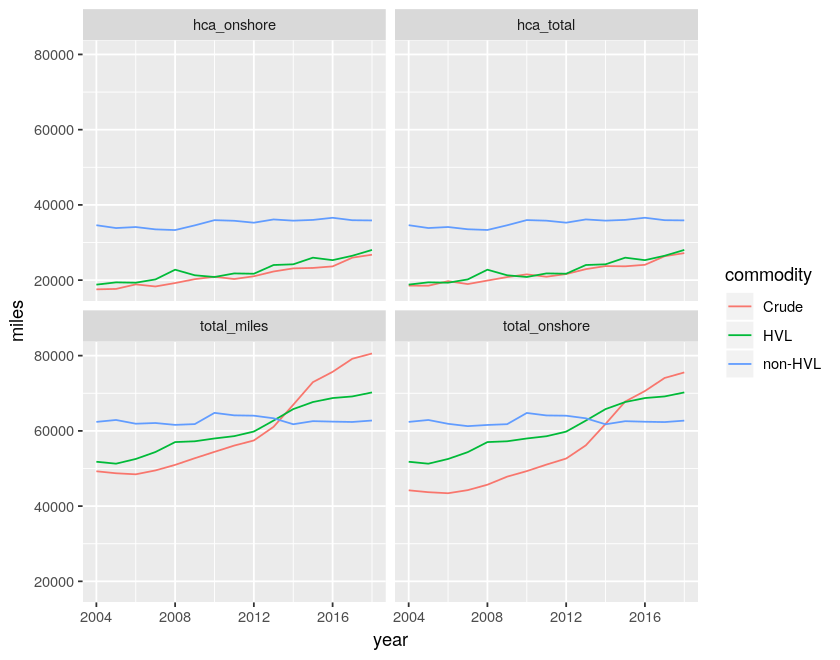

In [15]:
print(data_consistency)

## Grab largest companies

### Largest operators by total miles

In [16]:
largest_companies <- sample %>%
    group_by(Name) %>%
    filter(TOTAL_MILES == max(TOTAL_MILES)) %>%
    ungroup() %>%
    mutate(Name = fct_reorder(Name, TOTAL_MILES)) %>%
    arrange(desc(TOTAL_MILES)) %>%
    select(Name, TOTAL_MILES, OPERATOR_ID)

head(largest_companies) %>%
    jupyter_styling(font_size = 16)

Name,TOTAL_MILES,OPERATOR_ID
Enterprise Products Operating,13401.76,31618
ONEOK (Group),10784.50,ONEOK (Group)
Phillips 66 (Group),10356.00,Phillips 66 (Group)
Magellan (Group),9162.00,Magellan (Group)
Kinder Morgan (Group),7976.34,Kinder Morgan (Group)
NuStar (Group),7228.80,NuStar (Group)


In [17]:
largest_companies_plot <- largest_companies %>%
    top_n(35, TOTAL_MILES) %>%
    ggplot(aes(x = TOTAL_MILES, y = Name)) +
        geom_point()

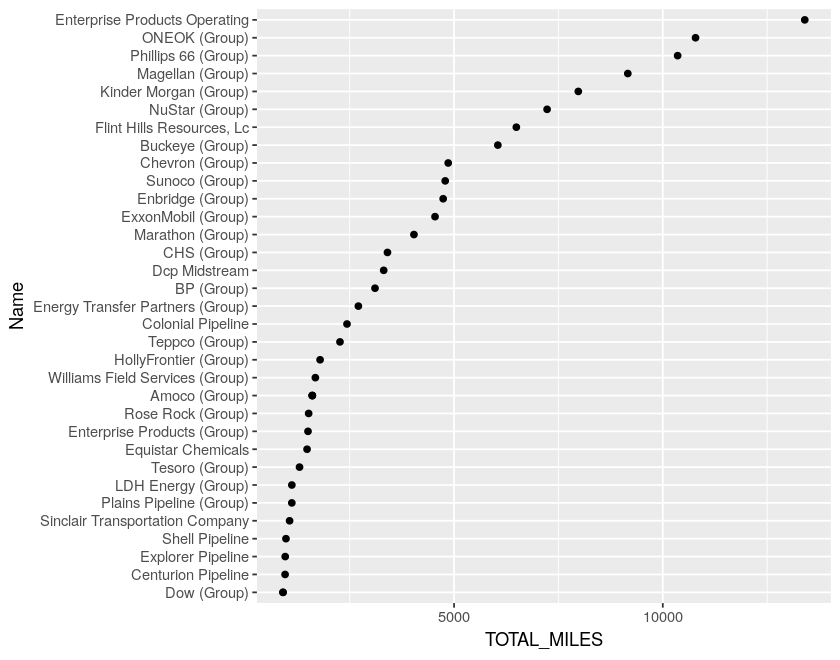

In [18]:
print(largest_companies_plot)

In [19]:
largest <- top_n(largest_companies, 6, TOTAL_MILES) %>%
    left_join(pipelines, by = c("OPERATOR_ID" = "ID")) %>%
    rename(ID = OPERATOR_ID) %>%
    select(-Name, name) %>%
    mutate(name = oildata::add_company_names(ID))
sample_n(largest, 5)

Warning message:
“Column `OPERATOR_ID`/`ID` joining factor and character vector, coercing into character vector”

TOTAL_MILES,ID,year,name,commodity,hca_offshore,hca_onshore,hca_total,total_onshore,total_offshore,total_miles
<dbl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10356.00,Phillips 66 (Group),2009,Phillips 66 (Group),HVL,0,954.275,954.275,3575.710,0,3575.710
7976.34,Kinder Morgan (Group),2007,Kinder Morgan (Group),Crude,0,135.000,135.000,520.000,0,520.000
9162.00,Magellan (Group),2007,Magellan (Group),non-HVL,0,3505.000,3505.000,8737.000,0,8737.000
10356.00,Phillips 66 (Group),2006,Phillips 66 (Group),non-HVL,0,2493.000,2493.000,4648.738,0,4648.738
10356.00,Phillips 66 (Group),2013,Phillips 66 (Group),HVL,0,853.070,853.070,3180.970,0,3180.970


## Qualitative

## Industry-wide trends

* Good short-term outlook.
* Mid-term: threat of regulations.
* Money being pulled out of many businesses.
* No initiatives to diversify.
* The top 3 companies listed below are not in direct competition (different sub-industries).

### Enterprise Products Operating

* Fortune # 105 (2018).
* Family-owned, publicly traded company (Duncan family).
* Dan Duncan founded EPO in 1968 and was CEO until 2010.
* Current CEO: Randas Duncan WIlliams.
* Wikipedia highlights several explosions 2011-2017.
* Natural gas midstream company (HVL)
* In addition to pipelines, owns storage facilities, 24 natural gas processing platns, six offshore hub platforms, etc.
* States primaru focus on shale gas in company statement.

----

Midstream company: selling to other companies

<img src="https://www.enterpriseproducts.com/images/about_us_system_map/completeMap.png">

### ONEOK

* Natural gas utility.
* Forbes #630 (2019).
* Aqcuired NGL systems from Koch Industries in 2005.
* Spun out distribution business (consumer business unit) in 2014) - still under ONEOK ownership (?).


----

Utility company*: selling to consumers

\* Also owns some midstream assets

<img src="ONEOK_network_2019-12-09.png">

In [20]:
subset(m_as, group_name == "ONEOK (Group)") %>%
    mutate(name = oildata::add_company_names(members, pipelines_2004))

group_name,members,start_year,end_year,type,name
<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>
ONEOK (Group),32109,NA,NA,group,Oneok Ngl Pipeline
ONEOK (Group),30629,NA,NA,group,Oneok Field Services


In [21]:
ONEOK_construction <- pipelines %>%
    filter(ID == "ONEOK (Group)") %>%
    ggplot(aes(x=year, y=total_miles, color=commodity)) +
        geom_line()

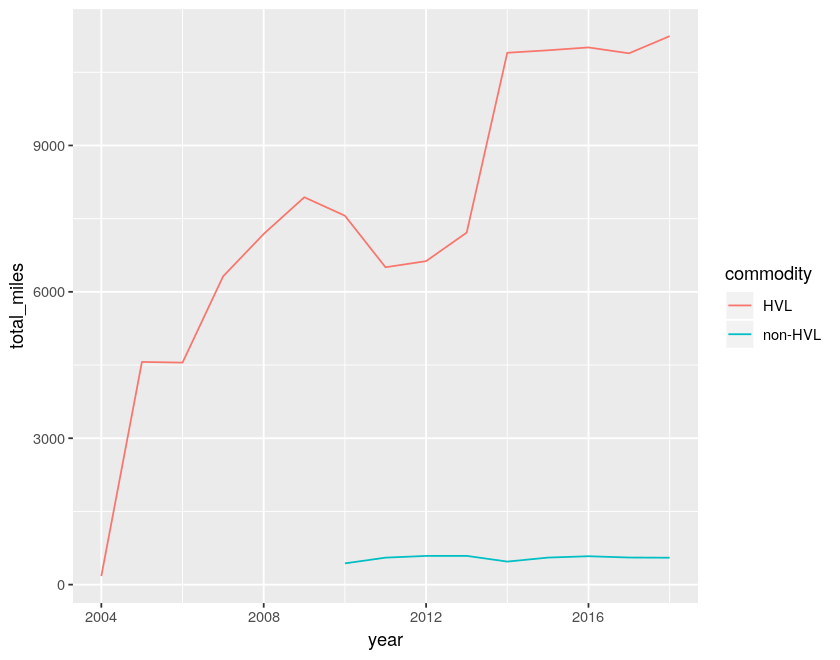

In [22]:
print(ONEOK_construction)

Acquisition probably does not show up because it was acquired as a whole.

In [23]:
pipelines_2004 %>%
    filter(ID %in% c(32109, 30629)) %>%
    select(ID, year, name) %>%
    jupyter_styling(font_size = 16)

ID,year,name
32109,2008,Oneok Ngl Pipeline
32109,2006,Oneok Ngl Pipeline
32109,2009,Oneok Ngl Pipeline
32109,2005,Oneok Ngl Pipeline
30629,2004,Oneok Field Services
32109,2007,Oneok Ngl Pipeline


### Phillips 66

* Spun off by ConocoPhillip in 2012.
* Forbes #23 (2018).
* Phllips: America-based, internationally active company (e.g., extraction in North Sea).
* Phillips (predecessor) experienced high-profile incidents in 1980, 1989, and 1999.
* Apart from midstream activities, also engages in chemicals, refining, and marketing (gas stations).
----
Downstream and midstream, diversified

<img src="phillips_66_network_2019-12-09.png">

## Information from the dataset

### Product mix - pipelines types

In [24]:
product_mix <- largest %>%
    pivot_wider(names_from = commodity, values_from = total_miles, id_cols = c(year, ID)) %>%
    select(year, ID, `non-HVL`, Crude, HVL) %>%
    group_by(year, ID) %>%
    summarize(`non-HVL` = sum(`non-HVL`, na.rm = T), Crude = sum(Crude, na.rm = T), HVL = sum(HVL, na.rm = T)) %>%
    ungroup() %>%
    mutate(total = `non-HVL` + Crude + HVL) %>%
    mutate(`perc_non-HVL` = `non-HVL` / total, perc_crude = Crude / total, perc_HVL = HVL / total) %>%
    mutate(name = oildata::add_company_names(ID))
sample_n(product_mix, 5)

year,ID,non-HVL,Crude,HVL,total,perc_non-HVL,perc_crude,perc_HVL,name
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2009,ONEOK (Group),0.000,0.000,7939.00,7939.00,0.00000000,0.0000000,1.00000000,ONEOK (Group)
2006,31618,442.198,797.265,12700.95,13940.42,0.03172057,0.0571909,0.91108853,Enterprise Products Operating
2018,Phillips 66 (Group),4314.290,2782.360,4415.51,11512.16,0.37475938,0.2416888,0.38355183,Phillips 66 (Group)
2017,Phillips 66 (Group),4320.840,2793.930,4419.60,11534.37,0.37460564,0.2422265,0.38316787,Phillips 66 (Group)
2014,Kinder Morgan (Group),6776.590,2041.370,704.56,9522.52,0.71163831,0.2143729,0.07398882,Kinder Morgan (Group)


In [25]:
product_mix_plot <- product_mix %>%
    pivot_longer(starts_with("perc"), names_to = "commodity") %>%
    ggplot(aes(x = year, y = value, color = commodity)) +
        facet_wrap(~name) +
        geom_line()

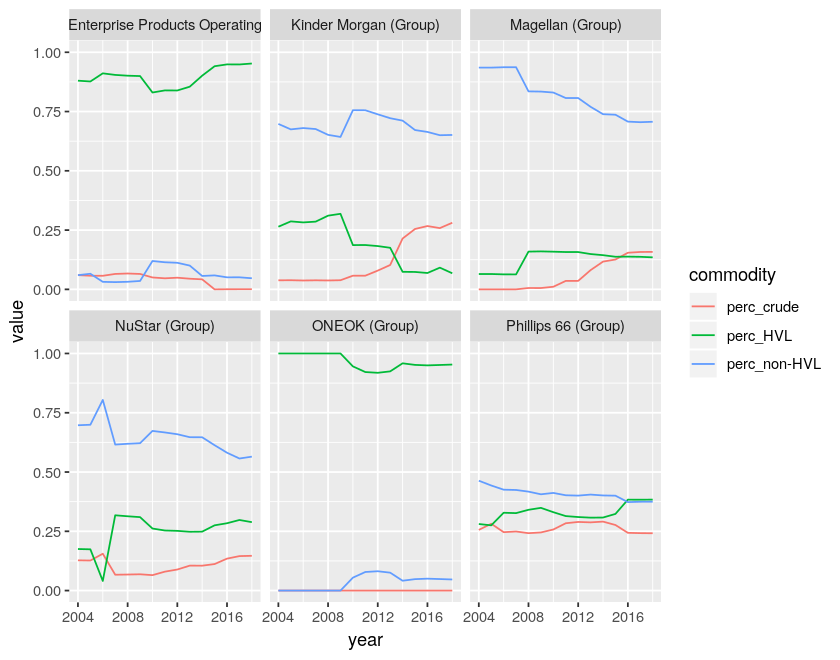

In [26]:
print(product_mix_plot)

In [27]:
construction <- largest %>%
    filter(commodity %in% c("Crude", "HVL", "non-HVL")) %>%
    ggplot(aes(x=year, y=total_miles, color=commodity)) +
        facet_wrap(~name) +
        geom_line()

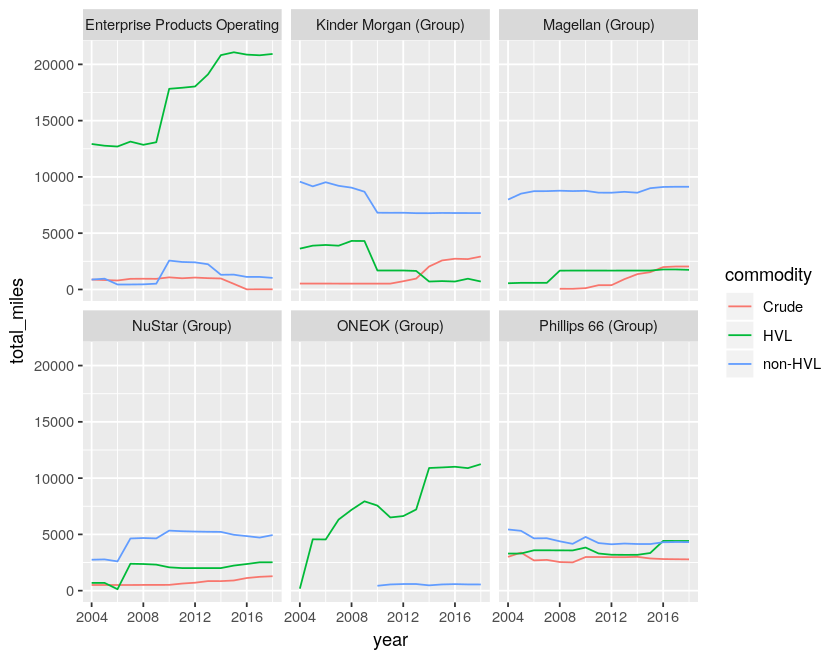

In [28]:
print(construction)

### Save slides*

* Run after saving!

In [31]:
system("jupyter nbconvert explore_data_variance.ipynb --to slides")